<a href="https://colab.research.google.com/github/LazyHooks/whitecrow/blob/main/master_pers_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [2]:
import warnings

warnings.filterwarnings('ignore')

input

In [3]:
df = pd.read_excel("Master Persona.xlsx")
df.head()

,Sl. No.,Sub Industry,Conventional vs Innovative - Do you prefer,Reactive vs Proactive - Do you produce your best work when you are,Cost Focused vs Growth Focused - Are you most comfortable in a company which is,Short Term vs Long Term - Do you enjoy an environment focused on,Process Orientation vs Results Orientation - Do you think a team or company should focus on,Bureaucratic vs Empowered - Do you prefer a company run via,Individualistic vs Collaborative - Do you produce your best work,People Oriented vs Task Oriented - Do you prefer to focus on,Conflict Avoidant vs Candid and Direct - Would you describe yourself as,Risk Averse vs Risk Taking - Would you describe yourself as
0,1,Professional Services GCC (Technology Platform...,1,0,1,1,1,1,1,0,0,1
1,2,Application Services,1,0,1,1,0,1,1,0,0,1
2,3,Professional Services GCC (Technology Platform...,1,1,1,1,1,1,1,0,0,1
3,4,Enterprise Product/ICT/ Cloud Platform,1,1,1,1,1,1,1,0,1,1
4,5,Professional Services GCC (Global Capability C...,1,1,1,1,0,1,1,1,1,0


In [4]:
df = df.drop('Sl. No.', axis = 1)
df = df.drop('Sub Industry', axis = 1)
df

,Conventional vs Innovative - Do you prefer,Reactive vs Proactive - Do you produce your best work when you are,Cost Focused vs Growth Focused - Are you most comfortable in a company which is,Short Term vs Long Term - Do you enjoy an environment focused on,Process Orientation vs Results Orientation - Do you think a team or company should focus on,Bureaucratic vs Empowered - Do you prefer a company run via,Individualistic vs Collaborative - Do you produce your best work,People Oriented vs Task Oriented - Do you prefer to focus on,Conflict Avoidant vs Candid and Direct - Would you describe yourself as,Risk Averse vs Risk Taking - Would you describe yourself as
0,1,0,1,1,1,1,1,0,0,1
1,1,0,1,1,0,1,1,0,0,1
2,1,1,1,1,1,1,1,0,0,1
3,1,1,1,1,1,1,1,0,1,1
4,1,1,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
4486,1,1,1,1,0,0,0,0,0,1
4487,1,1,1,1,1,1,0,1,1,1
4488,1,1,1,1,0,1,0,1,1,1
4489,0,1,1,1,1,1,1,0,1,1


exploratory

In [5]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype
---  ------                                                                                       --------------  -----
 0   Conventional vs Innovative - Do you prefer                                                   4491 non-null   int64
 1   Reactive vs Proactive - Do you produce your best work when you are                           4491 non-null   int64
 2   Cost Focused vs Growth Focused - Are you most comfortable in a company which is              4491 non-null   int64
 3   Short Term vs Long Term - Do you enjoy an environment focused on                             4491 non-null   int64
 4   Process Orientation vs Results Orientation - Do you think a team or company should focus on  4491 non-null   int64
 5   Bureaucratic vs Empowered - Do you prefer a comp

In [6]:
df.isnull().sum()

,Conventional vs Innovative - Do you prefer,Reactive vs Proactive - Do you produce your best work when you are,Cost Focused vs Growth Focused - Are you most comfortable in a company which is,Short Term vs Long Term - Do you enjoy an environment focused on,Process Orientation vs Results Orientation - Do you think a team or company should focus on,Bureaucratic vs Empowered - Do you prefer a company run via,Individualistic vs Collaborative - Do you produce your best work,People Oriented vs Task Oriented - Do you prefer to focus on,Conflict Avoidant vs Candid and Direct - Would you describe yourself as,Risk Averse vs Risk Taking - Would you describe yourself as
0,1,0,1,1,1,1,1,0,0,1
1,1,0,1,1,0,1,1,0,0,1
2,1,1,1,1,1,1,1,0,0,1
3,1,1,1,1,1,1,1,0,1,1
4,1,1,1,1,0,1,1,1,1,0


checks

In [7]:

df.describe()

,Conventional vs Innovative - Do you prefer,Reactive vs Proactive - Do you produce your best work when you are,Cost Focused vs Growth Focused - Are you most comfortable in a company which is,Short Term vs Long Term - Do you enjoy an environment focused on,Process Orientation vs Results Orientation - Do you think a team or company should focus on,Bureaucratic vs Empowered - Do you prefer a company run via,Individualistic vs Collaborative - Do you produce your best work,People Oriented vs Task Oriented - Do you prefer to focus on,Conflict Avoidant vs Candid and Direct - Would you describe yourself as,Risk Averse vs Risk Taking - Would you describe yourself as
count,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000
mean,0.812959,0.856602,0.877756,0.898686,0.454464,0.794923,0.839679,0.354932,0.590737,0.806947
std,0.389988,0.350517,0.327604,0.301777,0.497978,0.403803,0.366944,0.478546,0.491753,0.394738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
X=df

Scaling

In [9]:
cols = X.columns

In [10]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [11]:
X = pd.DataFrame(X, columns=[cols])

In [12]:
X.head()

,Conventional vs Innovative - Do you prefer,Reactive vs Proactive - Do you produce your best work when you are,Cost Focused vs Growth Focused - Are you most comfortable in a company which is,Short Term vs Long Term - Do you enjoy an environment focused on,Process Orientation vs Results Orientation - Do you think a team or company should focus on,Bureaucratic vs Empowered - Do you prefer a company run via,Individualistic vs Collaborative - Do you produce your best work,People Oriented vs Task Oriented - Do you prefer to focus on,Conflict Avoidant vs Candid and Direct - Would you describe yourself as,Risk Averse vs Risk Taking - Would you describe yourself as
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


In [13]:
#X.dropna(inplace=True)
#X

K means

In [14]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [15]:
kmeans.cluster_centers_

array([[8.15918367e-01, 8.58775510e-01, 9.06530612e-01, 8.97142857e-01,
        1.33781874e-14, 7.88979592e-01, 8.33061224e-01, 3.40408163e-01,
        5.96326531e-01, 7.88571429e-01],
       [8.09407153e-01, 8.53993141e-01, 8.43214111e-01, 9.00538951e-01,
        1.00000000e+00, 8.02057815e-01, 8.47623714e-01, 3.72366487e-01,
        5.84027438e-01, 8.29005390e-01]])

inertia

In [16]:
kmeans.inertia_

6267.555279424854

Elbow

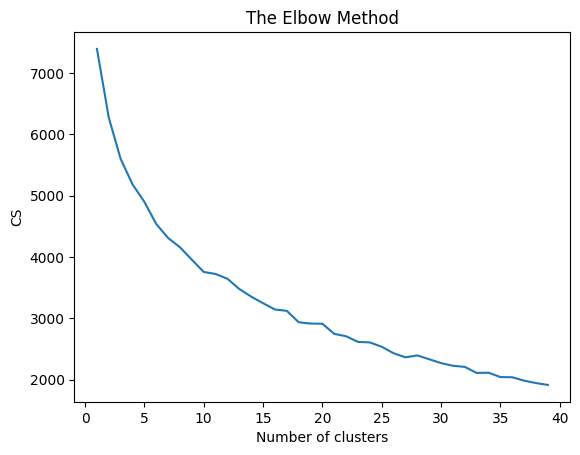

In [17]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

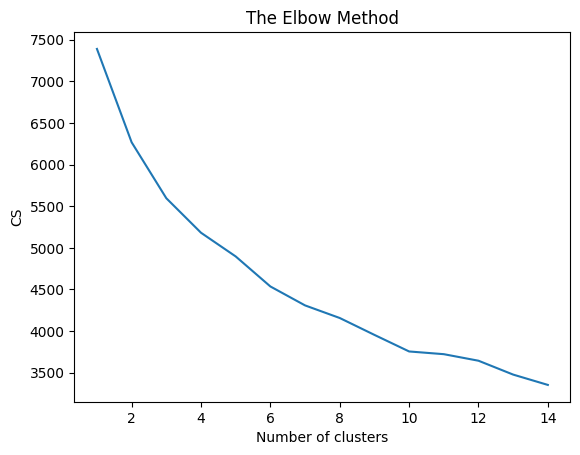

In [18]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=10, random_state=0)

In [39]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('master_pers_10_l.csv')
print(labels)

[1 3 1 ... 4 7 0]


In [40]:
Z=kmeans.cluster_centers_
Z

array([[ 8.95348837e-01,  9.03100775e-01,  8.94056848e-01,
         9.17312661e-01, -1.60982339e-15,  8.65633075e-01,
         1.00000000e+00,  4.99600361e-16,  1.00000000e+00,
         9.18604651e-01],
       [ 8.60911271e-01,  8.89688249e-01,  7.45803357e-01,
         8.92086331e-01,  1.00000000e+00,  8.05755396e-01,
         9.30455635e-01,  9.43689571e-16, -6.66133815e-16,
         1.00000000e+00],
       [ 8.98630137e-01,  8.87671233e-01,  8.41095890e-01,
         9.15068493e-01,  1.00000000e+00,  6.30136986e-01,
         9.58904110e-01,  1.00000000e+00,  1.00000000e+00,
         9.23287671e-01],
       [ 8.26783115e-01,  8.61717613e-01,  8.87918486e-01,
         9.21397380e-01, -1.49880108e-15,  8.26783115e-01,
         8.71906841e-01,  2.47452693e-01, -8.88178420e-16,
         1.00000000e+00],
       [ 8.73315364e-01,  7.46630728e-01,  8.97574124e-01,
         8.86792453e-01,  2.26415094e-01,  8.43665768e-01,
         1.22124533e-15,  8.11320755e-01,  8.00539084e-01,
         7.

In [41]:
import matplotlib

In [42]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4491 samples in 0.010s...
[t-SNE] Computed neighbors for 4491 samples in 0.650s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4491
[t-SNE] Computed conditional probabilities for sample 2000 / 4491
[t-SNE] Computed conditional probabilities for sample 3000 / 4491
[t-SNE] Computed conditional probabilities for sample 4000 / 4491
[t-SNE] Computed conditional probabilities for sample 4491 / 4491
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.750217
[t-SNE] KL divergence after 2500 iterations: 0.358120


In [43]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

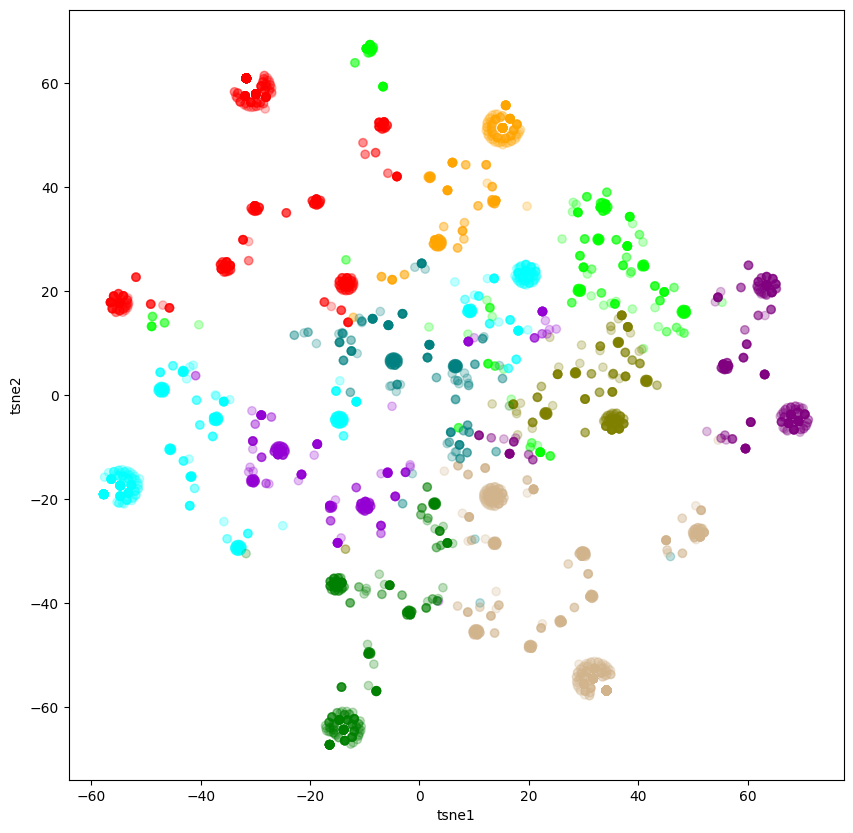

In [44]:
colors = ["red","green","blue","purple","yellow","cyan","black","lime","orange","magenta","darkviolet","gray","tan","khaki","olive","teal"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [45]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('master_pers_10.csv')
Z2

array([[ 8.95348837e-01,  9.03100775e-01,  8.94056848e-01,
         9.17312661e-01, -1.60982339e-15,  8.65633075e-01,
         1.00000000e+00,  4.99600361e-16,  1.00000000e+00,
         9.18604651e-01],
       [ 8.60911271e-01,  8.89688249e-01,  7.45803357e-01,
         8.92086331e-01,  1.00000000e+00,  8.05755396e-01,
         9.30455635e-01,  9.43689571e-16, -6.66133815e-16,
         1.00000000e+00],
       [ 8.98630137e-01,  8.87671233e-01,  8.41095890e-01,
         9.15068493e-01,  1.00000000e+00,  6.30136986e-01,
         9.58904110e-01,  1.00000000e+00,  1.00000000e+00,
         9.23287671e-01],
       [ 8.26783115e-01,  8.61717613e-01,  8.87918486e-01,
         9.21397380e-01, -1.49880108e-15,  8.26783115e-01,
         8.71906841e-01,  2.47452693e-01, -8.88178420e-16,
         1.00000000e+00],
       [ 8.73315364e-01,  7.46630728e-01,  8.97574124e-01,
         8.86792453e-01,  2.26415094e-01,  8.43665768e-01,
         1.22124533e-15,  8.11320755e-01,  8.00539084e-01,
         7.